## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.stats import norm, lognorm, uniform

import warnings
# warnings.filterwarnings('ignore')

In [2]:
print("Yfinance version: " , yf.__version__)

Yfinance version:  0.2.37


In [3]:
# Set default parameters for plt.title()
plt.rcParams['axes.titlepad'] = 12  # Set padding around the title
plt.rcParams['axes.titleweight'] = 'normal'  # Set title font size
plt.rcParams['axes.titlesize'] = 9  # Set title font size

## Fetch data

In [4]:
def fetch_stock_data(tickers, start_date, end_date, interval):
    data = yf.download(tickers, start=start_date, end=end_date, interval=interval)
    return data

In [5]:
# select tickers
tickers = ["IAU", "GOOG", "MSFT", "BRK-B", "KO", "JNJ", "DG", "DIS"] #, "BRK-B", "IAU", "GOOG", "AMZN", "AAPL", "TSM", "BAC", "WFC"]  #VALE, KO, JNJ, DG, DIS, SPY 

# date format YYYY-MM-DD
start_date = "2010-01-01"
end_date = "2024-02-01"

# time interval to take the cotations, in this case monthly
interval= "1d"

stock_data = fetch_stock_data(tickers, start_date, end_date, interval)

display(stock_data)

[*********************100%%**********************]  8 of 8 completed


Price        Adj Close                                                \
Ticker           BRK-B          DG        DIS        GOOG        IAU   
Date                                                                   
2010-01-04   66.220001   20.905287  27.843176   15.610239  21.978001   
2010-01-05   66.540001   21.068327  27.773722   15.541497  21.954000   
2010-01-06   66.199997   21.358166  27.626127   15.149715  22.326000   
2010-01-07   66.459999   21.503098  27.634811   14.797037  22.181999   
2010-01-08   66.440002   21.620844  27.678221   14.994298  22.290001   
...                ...         ...        ...         ...        ...   
2024-01-25  380.850006  132.880005  94.860001  153.639999  38.230000   
2024-01-26  385.399994  133.449997  95.360001  153.789993  38.180000   
2024-01-29  383.179993  133.690002  97.489998  154.839996  38.459999   
2024-01-30  387.149994  131.919998  96.940002  153.050003  38.509998   
2024-01-31  383.739990  132.070007  96.050003  141.800003  38.490002   

Price                                               Close              ...  \
Ticker             JNJ         KO        MSFT       BRK-B          DG  ...   
Date                                                                   ...   
2010-01-04   42.650639  18.498016   23.431591   66.220001   23.080000  ...   
2010-01-05   42.156075  18.274250   23.439157   66.540001   23.260000  ...   
2010-01-06   42.498966  18.267767   23.295319   66.199997   23.580000  ...   
2010-01-07   42.195641  18.222361   23.053055   66.459999   23.740000  ...   
2010-01-08   42.340706  17.885094   23.212046   66.440002   23.870001  ...   
...                ...        ...         ...         ...         ...  ...   
2024-01-25  158.357635  59.160000  404.122681  380.850006  132.880005  ...   
2024-01-26  158.298096  59.369999  403.184418  385.399994  133.449997  ...   
2024-01-29  158.159149  59.730000  408.963715  383.179993  133.690002  ...   
2024-01-30  157.573593  59.900002  407.835815  387.149994  131.919998  ...   
2024-01-31  157.702606  59.490002  396.846130  383.739990  132.070007  ...   

Price            Open               Volume                                \
Ticker             KO        MSFT    BRK-B       DG       DIS       GOOG   
Date                                                                       
2010-01-04  28.580000   30.620001  1575000   437200  13700400   78541293   
2010-01-05  28.424999   30.850000  1310000   283600  10307700  120638494   
2010-01-06  28.174999   30.879999  1760000   968100  10709500  159744526   
2010-01-07  28.165001   30.629999  1505000   360700   8202100  257533695   
2010-01-08  27.730000   30.280001  1500000   967300   7657500  189680313   
...               ...         ...      ...      ...       ...        ...   
2024-01-25  59.009998  404.320007  4055800  2097700   8661600   21495100   
2024-01-26  59.250000  404.369995  3621400  1384200   7812800   19494500   
2024-01-29  59.340000  406.059998  3797400  2488600  13422200   20909300   
2024-01-30  59.849998  412.260010  3090900  2799300   9139600   26578900   
2024-01-31  60.099998  406.959991  3856400  1803700   9592300   43908600   

Price                                              
Ticker          IAU       JNJ        KO      MSFT  
Date                                               
2010-01-04  1185000   9506200  13870400  38409100  
2010-01-05   936000  10673100  23172400  49749600  
2010-01-06  1091000  13171500  19264600  58182400  
2010-01-07   811500  10901600  13234600  50559700  
2010-01-08   737000   7898000  28712400  51197400  
...             ...       ...       ...       ...  
2024-01-25  4637800   5478900  14899700  21021200  
2024-01-26  3288100   5591900  13025100  17803300  
2024-01-29  3503900   6483200  14547100  24510200  
2024-01-30  4125600   7200500  22061500  33477600  
2024-01-31  9428800   8256800  22837000  47871100  

[3543 rows x 48 columns]

In [6]:
# select only the closing price
df_close = stock_data.Close.copy()
# df_close.info()
df_close.head(3)

Ticker,BRK-B,DG,DIS,GOOG,IAU,JNJ,KO,MSFT
Date,,,,,,,,
2010-01-04,66.220001,23.08,32.07,15.610239,21.978001,64.680000,28.520000,30.950001
2010-01-05,66.540001,23.26,31.99,15.541497,21.954000,63.930000,28.174999,30.959999
2010-01-06,66.199997,23.58,31.82,15.149715,22.326000,64.449997,28.165001,30.770000


In [7]:
# find the 
df_daily_return = (df_close
                   .copy()
                   .pct_change(periods=1)
                   .dropna()
)

# display(cov_yoy.describe())
df_daily_return.head(3)

Ticker,BRK-B,DG,DIS,GOOG,IAU,JNJ,KO,MSFT
Date,,,,,,,,
2010-01-05,0.004832,0.007799,-0.002495,-0.004404,-0.001092,-0.011596,-0.012097,0.000323
2010-01-06,-0.005110,0.013758,-0.005314,-0.025209,0.016945,0.008134,-0.000355,-0.006137
2010-01-07,0.003928,0.006785,0.000314,-0.023280,-0.006450,-0.007137,-0.002485,-0.010400


## Covariance

### Calculation (YoY)

In [8]:
# find the 
cov_yoy = (df_close
             .copy()
             .pct_change(periods=1)
             .dropna()
             .rolling(window=252)
             .cov()
             .dropna()
             .apply(lambda x: 252 * x)
)

# display(cov_yoy.describe())
cov_yoy

Ticker                BRK-B        DG       DIS      GOOG       IAU       JNJ  \
Date       Ticker                                                               
2011-01-03 BRK-B   0.053128  0.012544  0.029982  0.027957  0.001466  0.013038   
           DG      0.012544  0.080593  0.014508  0.009423  0.005088  0.008483   
           DIS     0.029982  0.014508  0.054604  0.034958  0.003176  0.015460   
           GOOG    0.027957  0.009423  0.034958  0.077881  0.004517  0.015215   
           IAU     0.001466  0.005088  0.003176  0.004517  0.027043  0.002342   
...                     ...       ...       ...       ...       ...       ...   
2024-01-31 GOOG    0.013296 -0.008520  0.020701  0.092002 -0.000423  0.002943   
           IAU    -0.002003  0.003991  0.000245 -0.000423  0.017211  0.000608   
           JNJ     0.007474  0.009506  0.003181  0.002943  0.000608  0.025120   
           KO      0.005884  0.010705  0.001811  0.003500  0.001323  0.007478   
           MSFT    0.007122 -0.003099  0.015533  0.037240  0.000893  0.000647   

Ticker                   KO      MSFT  
Date       Ticker                      
2011-01-03 BRK-B   0.013916  0.019899  
           DG      0.010182  0.013281  
           DIS     0.017042  0.027623  
           GOOG    0.015855  0.031771  
           IAU    -0.000165  0.003060  
...                     ...       ...  
2024-01-31 GOOG    0.003500  0.037240  
           IAU     0.001323  0.000893  
           JNJ     0.007478  0.000647  
           KO      0.016468  0.003397  
           MSFT    0.003397  0.057112  

[26328 rows x 8 columns]

In [9]:
cov_yoy[(cov_yoy.index.get_level_values('Ticker') == tickers[0])].head(3)

,Ticker,BRK-B,DG,DIS,GOOG,IAU,JNJ,KO,MSFT
Date,Ticker,,,,,,,,
2011-01-03,IAU,0.001466,0.005088,0.003176,0.004517,0.027043,0.002342,-0.000165,0.003060
2011-01-04,IAU,0.001567,0.005234,0.002442,0.004598,0.027621,0.002114,0.000324,0.002959
2011-01-05,IAU,0.001632,0.005091,0.002452,0.004963,0.027375,0.001984,0.000363,0.003065


In [10]:
cov11 = cov_yoy[(cov_yoy.index.get_level_values('Ticker') == tickers[0])][tickers[0]].values
cov12 = cov_yoy[(cov_yoy.index.get_level_values('Ticker') == tickers[0])][tickers[1]].values
# cov21 = cov12
cov22 = cov_yoy[(cov_yoy.index.get_level_values('Ticker') == tickers[1])][tickers[1]].values

### Plots

#### Normal:

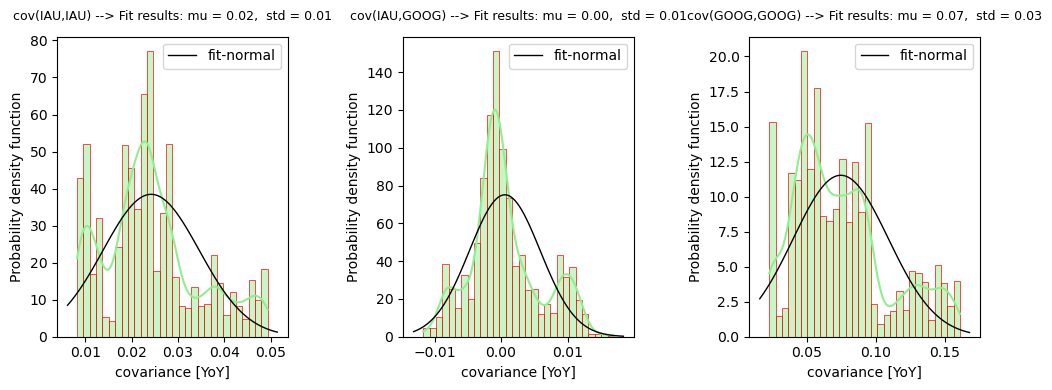

In [11]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Fit a Gaussian distribution to the YoY covariance
plt.subplot(1, 3, 1)
mu, std = norm.fit(cov11)
sns.histplot(data= cov11, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
plt.title(f"cov({tickers[0]},{tickers[0]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.ylabel("Probability density function")
plt.xlabel("covariance [YoY]")
plt.legend()

# Fit a Gaussian distribution to the YoY covariance
plt.subplot(1, 3, 2)
mu, std = norm.fit(cov12)
sns.histplot(data= cov12, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
plt.title(f"cov({tickers[0]},{tickers[1]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.ylabel("Probability density function")
plt.xlabel("covariance [YoY]")
plt.legend()

# Fit a Gaussian distribution to the YoY covariance
plt.subplot(1, 3, 3)
mu, std = norm.fit(cov22)
sns.histplot(data= cov22, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
plt.title(f"cov({tickers[1]},{tickers[1]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.ylabel("Probability density function")
plt.xlabel("covariance [YoY]")
plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

#### Lognormal:

C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


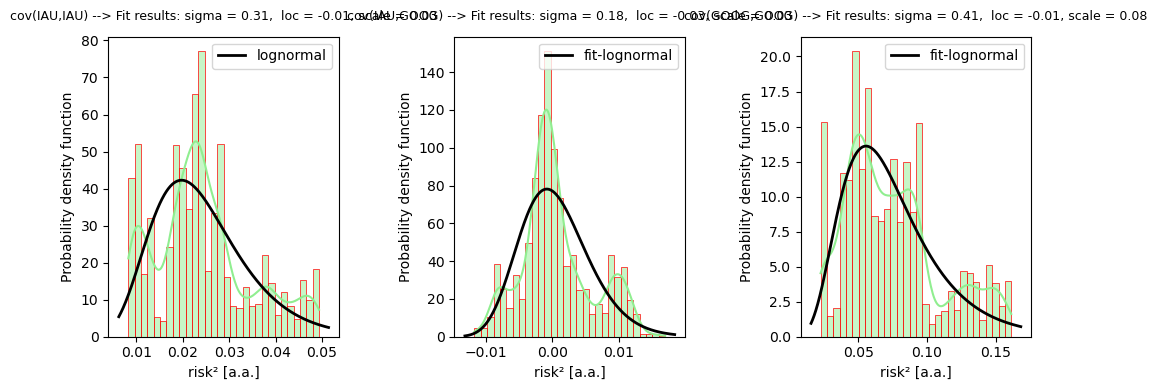

In [12]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Fit a Lognormal distribution to theYoY covariance
plt.subplot(1, 3, 1)
sigma, loc, scale = lognorm.fit(cov11)

sns.histplot(data= cov11, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', label="lognormal", linewidth=2)
plt.title(f"cov({tickers[0]},{tickers[0]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Probability density function")
plt.xlabel("risk² [a.a.]")
plt.legend()


# Fit a Lognormal distribution to theYoY covariance
plt.subplot(1, 3, 2)
sigma, loc, scale = lognorm.fit(cov12)

sns.histplot(data= cov12, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', label="fit-lognormal", linewidth=2)
plt.title(f"cov({tickers[0]},{tickers[1]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Probability density function")
plt.xlabel("risk² [a.a.]")
plt.legend()

# Fit a Lognormal distribution to theYoY covariance
plt.subplot(1, 3, 3)
sigma, loc, scale = lognorm.fit(cov22)

sns.histplot(data= cov22, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', label="fit-lognormal", linewidth=2)
plt.title(f"cov({tickers[1]},{tickers[1]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Probability density function")
plt.xlabel("risk² [a.a.]")
plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

## Correlation

### Calculation (YoY)

In [13]:
# find the covelation yoy
corr_yoy = (df_close
            .copy()
            .pct_change(periods=1)
            .dropna()
            .rolling(window=252)
            .corr()
            .dropna()
            # .apply(lambda x: x + 1.0)
)

# display(cov_yoy.describe())
corr_yoy

Ticker                BRK-B        DG       DIS      GOOG       IAU       JNJ  \
Date       Ticker                                                               
2011-01-03 BRK-B   1.000000  0.191704  0.556662  0.434621  0.038690  0.433429   
           DG      0.191704  1.000000  0.218693  0.118943  0.108992  0.228975   
           DIS     0.556662  0.218693  1.000000  0.536069  0.082663  0.506942   
           GOOG    0.434621  0.118943  0.536069  1.000000  0.098425  0.417764   
           IAU     0.038690  0.108992  0.082663  0.098425  1.000000  0.109126   
...                     ...       ...       ...       ...       ...       ...   
2024-01-31 GOOG    0.324003 -0.078945  0.263680  1.000000 -0.010624  0.061216   
           IAU    -0.112832  0.085500  0.007213 -0.010624  1.000000  0.029220   
           JNJ     0.348548  0.168565  0.077533  0.061216  0.029220  1.000000   
           KO      0.338923  0.234465  0.054513  0.089911  0.078600  0.367681   
           MSFT    0.220287 -0.036451  0.251108  0.513741  0.028471  0.017070   

Ticker                   KO      MSFT  
Date       Ticker                      
2011-01-03 BRK-B   0.383968  0.394278  
           DG      0.228104  0.213655  
           DIS     0.463798  0.539873  
           GOOG    0.361309  0.519934  
           IAU    -0.006367  0.084990  
...                     ...       ...  
2024-01-31 GOOG    0.089911  0.513741  
           IAU     0.078600  0.028471  
           JNJ     0.367681  0.017070  
           KO      1.000000  0.110778  
           MSFT    0.110778  1.000000  

[26328 rows x 8 columns]

In [14]:
corr_yoy[(corr_yoy.index.get_level_values('Ticker') == tickers[0])].head(3)

,Ticker,BRK-B,DG,DIS,GOOG,IAU,JNJ,KO,MSFT
Date,Ticker,,,,,,,,
2011-01-03,IAU,0.038690,0.108992,0.082663,0.098425,1.0,0.109126,-0.006367,0.084990
2011-01-04,IAU,0.040918,0.110954,0.062371,0.099130,1.0,0.097631,0.012315,0.081307
2011-01-05,IAU,0.042789,0.108331,0.062609,0.107841,1.0,0.092239,0.013854,0.084613


In [15]:
corr11 = corr_yoy[(corr_yoy.index.get_level_values('Ticker') == tickers[0])][tickers[0]].values
corr12 = corr_yoy[(corr_yoy.index.get_level_values('Ticker') == tickers[0])][tickers[1]].values
# corr21 = corr12
corr22 = corr_yoy[(corr_yoy.index.get_level_values('Ticker') == tickers[1])][tickers[1]].values

### Plots

#### Normal:

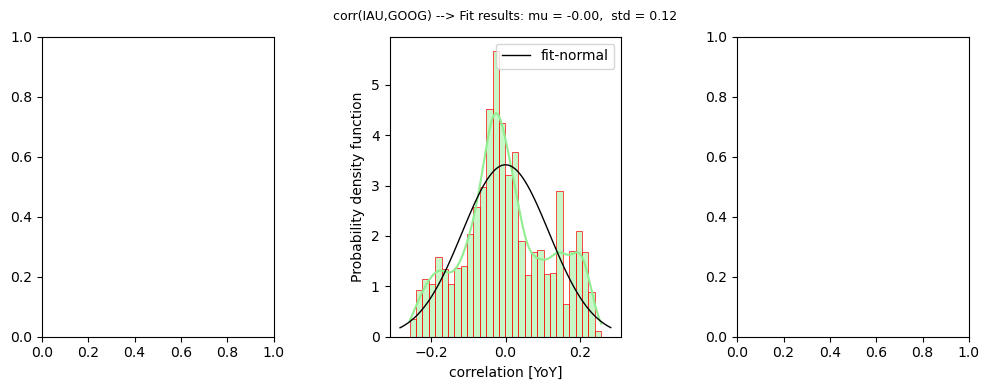

In [16]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Fit a Gaussian distribution to the YoY corrariance
plt.subplot(1, 3, 1)
# mu, std = norm.fit(corr11)
# sns.histplot(data= corr11, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)

# plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
# plt.title(f"corr({tickers[0]},{tickers[0]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
# plt.ylabel("Probability density function")
# plt.xlabel("correlation [YoY]")
# plt.legend()

# Fit a Gaussian distribution to the YoY corrariance
plt.subplot(1, 3, 2)
mu, std = norm.fit(corr12)
sns.histplot(data= corr12, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
plt.title(f"corr({tickers[0]},{tickers[1]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.ylabel("Probability density function")
plt.xlabel("correlation [YoY]")
plt.legend()

# Fit a Gaussian distribution to the YoY corrariance
plt.subplot(1, 3, 3)
# mu, std = norm.fit(corr22)
# sns.histplot(data= corr22, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)

# plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
# plt.title(f"corr({tickers[1]},{tickers[1]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
# plt.ylabel("Probability density function")
# plt.xlabel("correlation [YoY]")
# plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

#### Lognormal:

C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


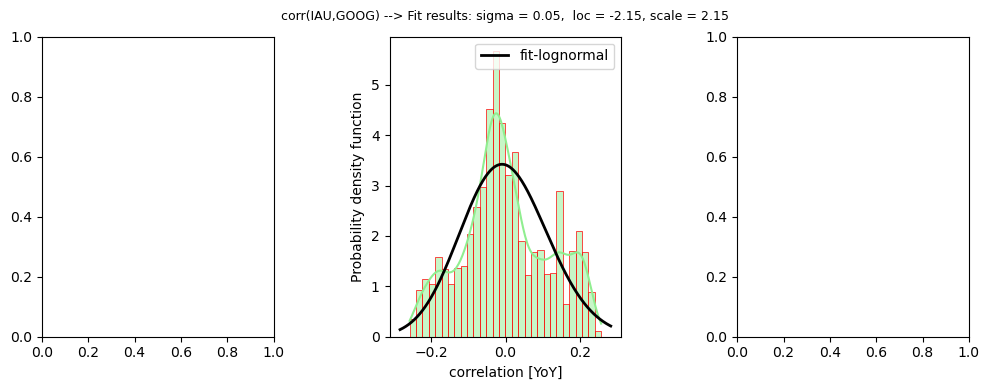

In [17]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Fit a Lognormal distribution to theYoY corrariance
plt.subplot(1, 3, 1)
# sigma, loc, scale = lognorm.fit(corr11)

# sns.histplot(data= corr11, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 1000)
# pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

# plt.plot(x, pdf, 'k', label="lognormal", linewidth=2)
# plt.title(f"corr({tickers[0]},{tickers[0]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
# plt.ylabel("Probability density function")
# plt.xlabel("correlation [YoY]")
# plt.legend()


# Fit a Lognormal distribution to theYoY corrariance
plt.subplot(1, 3, 2)
sigma, loc, scale = lognorm.fit(corr12)

sns.histplot(data= corr12, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', label="fit-lognormal", linewidth=2)
plt.title(f"corr({tickers[0]},{tickers[1]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Probability density function")
plt.xlabel("correlation [YoY]")
plt.legend()

# Fit a Lognormal distribution to theYoY corrariance
plt.subplot(1, 3, 3)
# sigma, loc, scale = lognorm.fit(corr22)

# sns.histplot(data= corr22, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 1000)
# pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

# plt.plot(x, pdf, 'k', label="fit-lognormal", linewidth=2)
# plt.title(f"corr({tickers[1]},{tickers[1]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
# plt.ylabel("Probability density function")
# plt.xlabel("correlation [YoY]")
# plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

## Monte carlo simulation

### Equations:
<br>

- **Portfolio Return**:
<br>
$$ \large R_P = {\omega}^T \cdot R $$
<br>
with $R_P$ being the return of the portfolio, $\omega$ the weights and $R$ the returns of the assets. Each one are given by:
<br><br>

<table>
  <tr>
    <td>
      $$
        \large{\omega} = \small \begin{bmatrix}
                {\omega}_A \\
                {\omega}_B \\
                {\omega}_C \\
        \end{bmatrix},
      $$
    </td>
    <td>
      and
    </td>
    <td>
    $$
        \large{R} = \small \begin{bmatrix}
                R_A \\
                R_B \\
                R_C \\
        \end{bmatrix}.
    $$
    </td>
  </tr>
</table>

<br>

- **Portfolio Risk**: 
<br>
$$ \large{{\sigma}^2_P} = {\omega}^T \cdot \Sigma \cdot \omega $$
<br>
in wich ${{\sigma}^2_P}$ is the variance of the portfolio and $\Sigma$ is the covariance matrix of the assets. The covariance matrix is given by:
<br>
<br>
$$ \large{\Sigma} = \small \begin{bmatrix}
                {{\sigma}^2_A} & cov(A,B) & cov(A,C) \\
                cov(A,B) & {{\sigma}^2_B} & cov(B,C) \\
                cov(A,C) & cov(B,C) & {{\sigma}^2_C} \\
            \end{bmatrix}.
$$
<br>
<br>
The weight matrix ${\omega}$ have dimensios of $({n}_{stocks}, {n}_{samples})$, with ${n}_{stocks}$ being the number of stocks in the portfolio and ${n}_{samples}$ the number of samples for data simulation. So, the weight matrix is defined as:
<br>
<br>
$$ \large{\omega} = \small \begin{bmatrix}
                                {{\omega}^{(1)}_1} & {{\omega}^{(1)}_2} & {{\omega}^{(1)}_3} & \cdot \cdot \cdot & {{\omega}^{(1)}_{n_{samples}}} \\
                                {{\omega}^{(2)}_1} & {{\omega}^{(2)}_2} & {{\omega}^{(2)}_3} & \cdot \cdot \cdot & {{\omega}^{(2)}_{n_{samples}}} \\
                                {{\omega}^{(3)}_1} & {{\omega}^{(3)}_2} & {{\omega}^{(3)}_3} & \cdot \cdot \cdot & {{\omega}^{(3)}_{n_{samples}}} \\
                                \cdot              &      \cdot         &         \cdot      &         \cdot     &            \cdot                \\
                                {{\omega}^{(n_{stocks})}_1} & {{\omega}^{(n_{stocks})}_2} & {{\omega}^{(n_{stocks})}_3} & \cdot \cdot \cdot & {{\omega}^{(n_{stocks})}_{n_{samples}}} \\
                    \end{bmatrix}.
$$
<br>


## Generate samples from distributions models - Covariance

#### Cov pairs

In [18]:
# Number of samples
num_samples = 1_000

In [19]:
# Generate all pairs of assets for covariance matrix
def generate_cov_pairs():    
    ticker_pairs1 = [(tickers[i], tickers[j]) for i in range(len(tickers)) for j in range(i, len(tickers))]
    ticker_pairs2 = [(j,i) for i,j in ticker_pairs1]
    pairs = set(ticker_pairs1).union(set(ticker_pairs2))
    
    ticker_map = dict(zip(tickers, range(0, len(tickers))))
    
    return pairs, ticker_map

cov_pairs, ticker_map = generate_cov_pairs()

#### Cov fitting params

In [20]:
# Empty dict to receive the parameters
cov_fitting_params = {}

for i, j in cov_pairs:

    if i == j:
        
        df = (df_daily_return[[i]]
              .copy()
              .rolling(window=252)
              .var()
              .dropna()
              .apply(lambda x: 252 * x)
            )
        
        sigma, loc, scale = lognorm.fit(df)
        cov_fitting_params[(i,j)] = {"sigma": sigma, "loc": loc, "scale": scale}

    else:
        
        df = (df_daily_return[[i,j]]
              .copy()
              .rolling(window=252)
              .cov()
              .dropna()
              .apply(lambda x: 252 * x)
            )
    
        cov_ij = df[(df.index.get_level_values('Ticker') == i)][j]
    
        sigma, loc, scale = lognorm.fit(cov_ij)    
        cov_fitting_params[(i,j)] = {"sigma": sigma, "loc": loc, "scale": scale}
    
# cov_fitting_params


C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\DELL\anaconda3\Lib\site-p

#### Cov samples

In [21]:
def calculate_cov_samples(cvp, num_samples=1_000):
    sigma   = cov_fitting_params[cvp]["sigma"]
    loc     = cov_fitting_params[cvp]["loc"]
    scale   = cov_fitting_params[cvp]["scale"]
    samples = lognorm.rvs(sigma, loc=loc, scale=scale, size=num_samples, random_state=42)
    return samples

In [22]:
# Defining return dict to receive the samples from distributions models builted with their respective parameters
cov_samples_lognormal = { cvp: calculate_cov_samples(cvp, num_samples) for cvp in cov_pairs }

# Reshaping from (num_samples,) --> (num_samples, 1, 1)
cov_samples_reshaped  = { cvp: cov_samples_lognormal[cvp].reshape(num_samples, 1, 1) for cvp in cov_samples_lognormal.keys() }

# Indexes index array to keys with respective samples, ex.: (BRK-B, IAU) --> (0, 1) 
cov_samples_mapped     = {(ticker_map[i], ticker_map[j]): cov_samples_reshaped[(i,j)] for i, j in cov_samples_reshaped.keys() } 


## Build Cov matrix

In [23]:
# Create empty array with the final shape
cov_matrix = np.zeros((num_samples, len(tickers), len(tickers)), dtype=np.float64)

# Map the values in the dictionary to the new array
for (i, j), arr in cov_samples_mapped.items():    
    cov_matrix[:, i, j] = arr[:, 0, 0]


In [24]:
cov_matrix.shape

(1000, 8, 8)

## Generate weights

In [25]:
def make_wight_matrix(n_tickers, n_samples=1000):
    rand_values = uniform.rvs(size= int(n_tickers * n_samples)).reshape((n_tickers, n_samples))
    normalized_values = rand_values / rand_values.sum(axis=0, keepdims=True)
    return normalized_values

# Matrix of the weights
weight_matrix = make_wight_matrix(len(tickers), num_samples)


In [26]:
weight_matrix.shape

(8, 1000)

## Build Risk Matrix

In [27]:
%time risk_total_matrix = np.dot( np.dot( weight_matrix.T, cov_matrix),  weight_matrix)

# Initialize risk_matrix with zeros of shape (num_samples, num_samples)
risk_matrix = np.zeros((num_samples, num_samples))

# Filter only columns with the risks os Markowitz
for i in range(num_samples):
    risk_matrix[:, i] = risk_total_matrix[i, :, i]


CPU times: total: 43.7 s
Wall time: 1min 4s


In [28]:
risk_matrix.shape

(1000, 1000)

## Analise Results

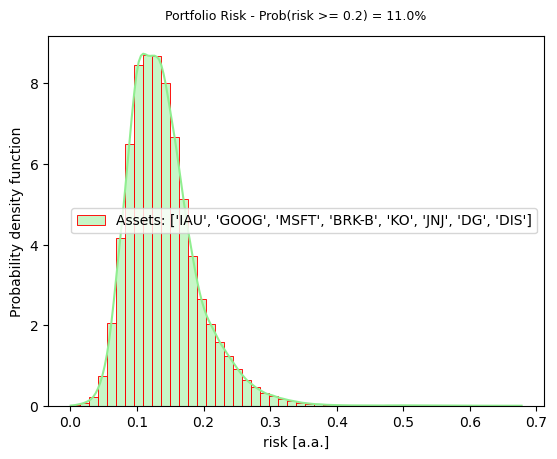

In [30]:
# Fit a Lognormal distribution to the returns_daily (actually, the pricing ratio Pn+12/Pn)
risk_reshaped = risk_matrix.reshape(-1)
data = np.sqrt(risk_reshaped[risk_reshaped >= 0])
# sigma, loc, scale = lognorm.fit(data)

sns.histplot(data= data, bins=50, stat="density", kde=True, color='lightgreen', edgecolor='red', label=f"Assets: {tickers}")
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 1000)
# pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

# plt.plot(x, pdf, 'k', label="lognormal", linewidth=2)
# plt.title(f"Portfolio {tickers} --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
threshold = 0.2
risk_threshold = np.count_nonzero(data > threshold) / np.max(data.shape)

plt.title(f"Portfolio Risk - Prob(risk >= {threshold}) = {int(100 * risk_threshold)}.0%")
plt.ylabel("Probability density function")
plt.xlabel("risk [a.a.]")
plt.legend()
plt.show()

#### Analise results

In [31]:
## MAP the final values to source values in their respective arrays:
# risk_matrix[i, j] == risk_total_matrix[j, i, j]
# risk_total_matrix[j, i, j] == interm_matrix[j, i, :]  *  weight_matrix[:, j]
# interm_matrix[j, i, :] == weight_matrix.T[j, :]  *  cov_matrix[ i, :, :]

In [32]:
# Find the coordinates (indices) of the minimum value
i, j = np.unravel_index(np.argmin(risk_matrix), risk_matrix.shape)

# Print the coordinates
print("Coordinates of the minimum value:", i, j)
print("Minimum value: ", risk_total_matrix[j, i, j])
del risk_total_matrix

Coordinates of the minimum value: 262 622
Minimum value:  -0.0033993947872472353


In [34]:
w_T = weight_matrix.T[j, :].reshape(1, len(tickers))
w_T

array([[0.4133975 , 0.15449677, 0.13627856, 0.06930843, 0.12566497,
        0.01440595, 0.02479828, 0.06164955]])

In [35]:
cov = cov_matrix[ i, :, :].reshape(len(tickers), len(tickers))
cov

array([[ 2.43570401e-03, -1.26574065e-02, -1.47302616e-02,
        -1.12652854e-02, -4.36395777e-03, -5.17337229e-03,
        -5.48331378e-03, -8.90424535e-03],
       [-1.26574065e-02,  1.08894622e-02,  8.65656426e-03,
         6.00433341e-04,  8.88293985e-04,  1.70950397e-03,
        -6.35585359e-03, -1.88651005e-03],
       [-1.47302616e-02,  8.65656426e-03,  1.55557122e-02,
         2.35391949e-03,  6.45403315e-04,  1.10564347e-03,
        -2.23668427e-03, -1.92672965e-03],
       [-1.12652854e-02,  6.00433341e-04,  2.35391949e-03,
         1.12631345e-02, -2.46598736e-04,  1.74246535e-03,
         2.87816524e-03,  3.26537884e-03],
       [-4.36395777e-03,  8.88293985e-04,  6.45403315e-04,
        -2.46598736e-04,  8.17601213e-03,  1.55233147e-04,
         1.07246751e-03, -5.55467524e-05],
       [-5.17337229e-03,  1.70950397e-03,  1.10564347e-03,
         1.74246535e-03,  1.55233147e-04,  8.59485565e-03,
        -2.42424744e-03, -1.89816356e-03],
       [-5.48331378e-03, -6.355853

In [36]:
int_matrix = w_T.dot(cov)
int_matrix

array([[-0.00504466, -0.0024665 , -0.0025462 , -0.00319606, -0.0005431 ,
        -0.00163692, -0.00252721, -0.0034043 ]])

In [37]:
w = weight_matrix[:, j].reshape(len(tickers), 1)
w

array([[0.4133975 ],
       [0.15449677],
       [0.13627856],
       [0.06930843],
       [0.12566497],
       [0.01440595],
       [0.02479828],
       [0.06164955]])

In [38]:
risk_final = int_matrix.dot(w)
risk_final

array([[-0.00339939]])